Assignment 2 - Itay Katanov

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

In [3]:
#Load Data
vaccination_tweets_df = pd.read_csv("vaccination_all_tweets.csv") 

# Part 1

## Task 1

* Report the number of rows and the number of columns in the dataset.

In [4]:
#Report the number of rows and the number of columns in the dataset.
print("Number of rows is %d and the number of columns is %d in the dataset."%(len(vaccination_tweets_df), len(vaccination_tweets_df.columns)))

Number of rows is 27809 and the number of columns is 16 in the dataset.


* Report the structure of the data.

In [5]:
#Report the structure of the data and calculate descriptive statistics for all numeric columns. 
#Descriptiv e statistics include the mean, standard deviation, maximum and minimum.
print(vaccination_tweets_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27809 entries, 0 to 27808
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                27809 non-null  int64 
 1   user_name         27809 non-null  object
 2   user_location     21363 non-null  object
 3   user_description  25863 non-null  object
 4   user_created      27809 non-null  object
 5   user_followers    27809 non-null  int64 
 6   user_friends      27809 non-null  int64 
 7   user_favourites   27809 non-null  int64 
 8   user_verified     27809 non-null  bool  
 9   date              27809 non-null  object
 10  text              27809 non-null  object
 11  hashtags          21946 non-null  object
 12  source            27794 non-null  object
 13  retweets          27809 non-null  int64 
 14  favorites         27809 non-null  int64 
 15  is_retweet        27809 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 3.0+ MB
None

Numeric columns descriptive statistics:

In [6]:
# describe() function only takes numeric columns
print(vaccination_tweets_df.describe())

                 id  user_followers   user_friends  user_favourites  \
count  2.780900e+04    2.780900e+04   27809.000000     2.780900e+04   
mean   1.361958e+18    1.172269e+05    1306.935165     1.455530e+04   
std    8.251514e+15    9.072728e+05    6541.832115     4.063751e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.359557e+18    1.170000e+02     140.000000     3.190000e+02   
50%    1.365093e+18    5.730000e+02     414.000000     2.014000e+03   
75%    1.367348e+18    3.061000e+03    1178.000000     1.078200e+04   
max    1.371026e+18    1.486666e+07  380428.000000     1.205878e+06   

           retweets     favorites  
count  27809.000000  27809.000000  
mean       3.389478     14.404761  
std       36.582408    197.615420  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      1.000000  
75%        1.000000      4.000000  
max     2360.000000  22815.000000  


* Print number of unique values for all columns of type object in ascending order.

In [8]:
# In ascending order, print the number of unique values for all columns of type object
for column in sorted(vaccination_tweets_df.select_dtypes(include='object').columns):
    print("Number of unique value for column %s (type 'object') is: %d." %(column, len(pd.unique(vaccination_tweets_df[column]))))

Number of unique value for column date (type 'object') is: 27534.
Number of unique value for column hashtags (type 'object') is: 10751.
Number of unique value for column source (type 'object') is: 133.
Number of unique value for column text (type 'object') is: 27784.
Number of unique value for column user_created (type 'object') is: 16052.
Number of unique value for column user_description (type 'object') is: 15129.
Number of unique value for column user_location (type 'object') is: 6116.
Number of unique value for column user_name (type 'object') is: 15924.


* Print the proportion of True values for all columns of type bool in descending order.

In [9]:
#In descending order, print the proportion of True values for all columns of type bool.
for column in sorted(vaccination_tweets_df.select_dtypes(include='bool').columns, reverse=True):
    true_proportion = sum(vaccination_tweets_df[column])*100/len(vaccination_tweets_df[column])
    print("The proportion of True value for column %s (type 'bool') is: %.2f." %(column, true_proportion))

The proportion of True value for column user_verified (type 'bool') is: 12.22.
The proportion of True value for column is_retweet (type 'bool') is: 0.00.


## Task 2

* Create a new column tweet_length and plot an histogram.

In [10]:
# Create a new column tweet_length equal to the number of characters in each tweet. Create a
# histogram showing the distribution of values in this new column using 25 bins with
# appropriate customisations. Interpret the plot.
vaccination_tweets_df['tweet_length'] = vaccination_tweets_df['text'].str.len()

In [11]:
vaccination_tweets_df['tweet_length'].describe()

count    27809.000000
mean       127.161746
std         23.236837
min         13.000000
25%        127.000000
50%        139.000000
75%        140.000000
max        152.000000
Name: tweet_length, dtype: float64

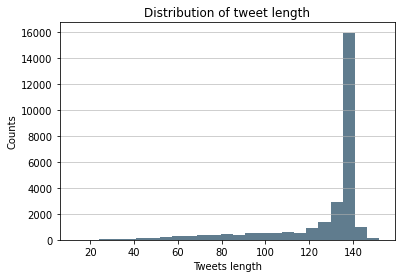

In [12]:
vaccination_tweets_df['tweet_length'].plot.hist(bins=25, color='#607c8e')
plt.title('Distribution of tweet length')
plt.xlabel('Tweets length')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

We can see that the majority (16k tweets) of tweets is around 139 length (which is also the median).  
We can see the distribution has a long left tail.

* Create a new column retweet_prop and inspect it.

In [13]:
# Create a new column retweet_prop equal to the number of retweets divided by the number of
# followers. Inspect this column. What problem has occurred?
vaccination_tweets_df['retweet_prop'] = vaccination_tweets_df['retweets']/vaccination_tweets_df['user_followers']
vaccination_tweets_df['retweet_prop'].describe()

count    2.764300e+04
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.841450e-04
max               inf
Name: retweet_prop, dtype: float64

The problem with the coulmn is the we get inf/NaN value for some values. This is probably because we have missing value/user the do not have followers, so when dividing with it we get an error.

* Histogram for retweet_prop which are less than or equal 1.

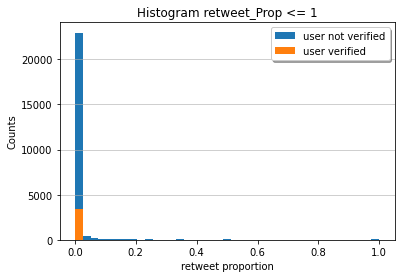

In [14]:
#For tweets where retweet_prop is less than or equal to 1, create a histogram coloured by
#whether the user is verified. Add reasonable customisations to the plot and interpret it.
bins = np.linspace(0, 1, 40)
plt.hist(vaccination_tweets_df.loc[(vaccination_tweets_df['retweet_prop']<=1) 
            & (vaccination_tweets_df['user_verified']==False), "retweet_prop"], bins=bins, label="user not verified")
plt.hist(vaccination_tweets_df.loc[(vaccination_tweets_df['retweet_prop']<=1) 
            & (vaccination_tweets_df['user_verified']==True), "retweet_prop"],bins=bins, label="user verified")
plt.title('Histogram retweet_Prop <= 1')
plt.legend(loc='upper right', shadow=True)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('retweet proportion')
plt.ylabel('Counts')
plt.show()

Interpretation: The vast majority of retweets ratios is close to 0. This makes sense as most tweets are not retweeted.<br>
This is true both for verified and unverified users. We can see that are much more unverified users with low <br>
retweet_prop, which also makes sense because people will not retweet someone who is not verified (maybe it is a bot or something).

## Task 3

• Create a new column called account_year reporting the year the account associated with each tweet was created. Create a stacked bar chart showing the number of verified and unverified accounts created each year. Include appropriate customisation.

In [15]:
vaccination_tweets_df['account_year'] =  pd.to_datetime(vaccination_tweets_df.user_created).dt.year

In [16]:
#preper data frame for plotting
total_users_per_year = vaccination_tweets_df.groupby( by = "account_year").size()
verified_users_per_year = vaccination_tweets_df[vaccination_tweets_df['user_verified']].groupby( by = "account_year").size()
not_verified_users = total_users_per_year.sub(verified_users_per_year, fill_value=0)
data = {"verified": verified_users_per_year,
       "not verified": not_verified_users}
plot_df = pd.concat(data, axis=1).fillna(0).astype(int)

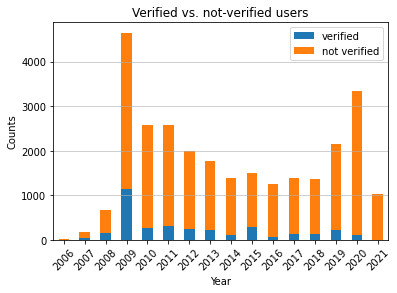

In [17]:
plot_df.plot.bar(stacked=True)
plt.title('Verified vs. not-verified users')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.show()

We can see the most of the users per year are not verified.

• The source column takes a lot of different values, but only a few are common. Identify the five most common values of the source column, then modify the column to change all other values to be “Other”.

In [18]:
top_5_sources = vaccination_tweets_df["source"].value_counts()[:5].index.tolist()
#Replace value to 'Other'
vaccination_tweets_df.loc[vaccination_tweets_df["source"].isin(top_5_sources) == False, "source"] = "Other"

• Create a pie chart showing the breakdown of the categories in the newly modified source variable. Display the percentage of each category on the pie chart. Interpret the plot.

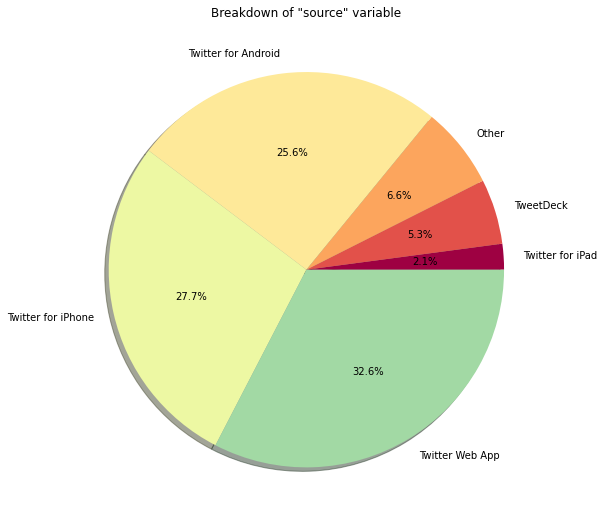

In [22]:
#Prepare plot data
source_type = vaccination_tweets_df.groupby('source').agg('count').id
source_labels = source_type.sort_values().index  
source_counts = source_type.sort_values()
#Plot it.
plt.figure(1, figsize=(40,20))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.subplot(the_grid[0, 1], aspect=1, title='Breakdown of "source" variable')
type_show_ids = plt.pie(source_counts, labels=source_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

We can see that about 85% of the source catagory is coming from Android, Iphone and Web app. The last 15% are divided between Ipad, Deck and 'Other'.
So the majoirty of tweeters are using Twitter by their phone or web app.

• Create a column that shows how many minutes have passed each day by the time the tweet was made (e.g., a tweet at 17:52:03 becomes 1072.05). Create a histogram showing the distribution of times that tweets are made at with appropriate customisations.

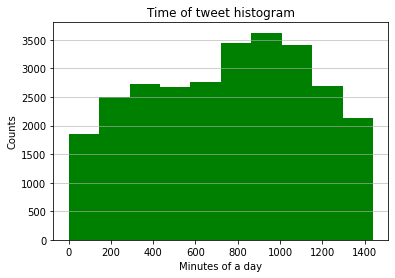

In [23]:
#Change 'date' to datetime
vaccination_tweets_df["date"] =  pd.to_datetime(vaccination_tweets_df["date"])
#Create a new column and calculate minutes passed each day
hours = vaccination_tweets_df["date"].dt.hour*60
minutes = vaccination_tweets_df["date"].dt.minute
seconds = vaccination_tweets_df["date"].dt.second/60
vaccination_tweets_df['minutes_passed_day'] =  hours +  minutes + seconds
#Plot histogram:
vaccination_tweets_df['minutes_passed_day'].plot.hist(color='green')
plt.title('Time of tweet histogram')
plt.xlabel('Minutes of a day')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Task 4

• What is the maximum number of characters associated with a single hashtag? For example, the ‘Pfizer’ hashtag has 6 characters.

In [24]:
def split_hashtag_to_array(hashtag_input):
    """
    This function get a single hastag, breaks it down to an array and returns the array.
    If the hashtag is enmpty (i.e. 'nan'), then it returns an empty array.
    """
    hashtag_array = []
    if (str(hashtag_input)!='nan'):
        hashtag_array = hashtag_input.split(",")
        hashtag_array = [hashtag.replace("'", "").replace(",","").replace("[","").replace("]","").strip() for hashtag in hashtag_array]
    return hashtag_array

In [25]:
def get_max_hashtag(hashtag_input):
    """
    This function get a single hastag, breaks it down to an array and return the length of the longest hashtag.
    If the hashtag is enmpty (i.e. 'nan'), then it returns 0.
    """
    hashtag_array = split_hashtag_to_array(hashtag_input)
    if (len(hashtag_array)>0):
        return len(max(hashtag_array, key=len))
    else:
        return 0 

In [28]:
#Appply the function on each hashtag
vaccination_tweets_df["max_hashtag_length"] = vaccination_tweets_df["hashtags"].apply(get_max_hashtag)
print("Maximum number of charchater for a single hashtag is %d."% max(vaccination_tweets_df["max_hashtag_length"]))

Maximum number of charchater for a single hashtag is 41.


• Create three columns corresponding to whether each tweet mentioned Pfizer, Moderna, or AstraZeneca. Create a line plot with three lines corresponding to the number of times Pfizer, Moderna, or AstraZeneca was mentioned. Your x-axis should be the date.

In [29]:
#Init 3 new columns
vaccination_tweets_df["pfizer_tweet"] = 0
vaccination_tweets_df["moderna_tweet"] = 0
vaccination_tweets_df["astraZ_zneca_tweet"] = 0

In [30]:
def check_hashtag_for_word(hashtag_input, phrase):
    """
    This function get two arguments: a hastag and a phrase. 
    It breaks the hashtag down to an array and return 1 is the phrase is found within the hashtag, 0 otherwise.
    """
    hashtag_array = split_hashtag_to_array(hashtag_input)
    if (len(hashtag_array)>0):
        if phrase in hashtag_array:
            return 1
    return 0

In [32]:
#Apply function to each column
vaccination_tweets_df["pfizer_tweet"] = vaccination_tweets_df["hashtags"].apply(check_hashtag_for_word, args=("Pfizer",))
vaccination_tweets_df["moderna_tweet"] = vaccination_tweets_df["hashtags"].apply(check_hashtag_for_word, args=("Moderna",))
vaccination_tweets_df["astraZ_zneca_tweet"] = vaccination_tweets_df["hashtags"].apply(check_hashtag_for_word, args=("AstraZeneca",))

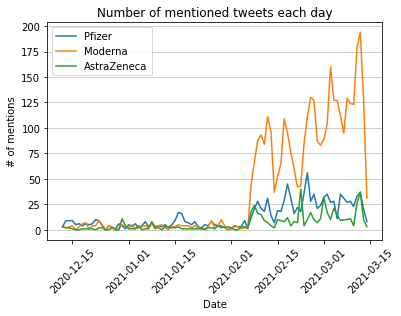

In [33]:
#Prepere data to plot
tweets_agg_df = vaccination_tweets_df.groupby(vaccination_tweets_df.date.dt.date)[["pfizer_tweet", "moderna_tweet", "astraZ_zneca_tweet"]].sum()
tweets_agg_df.columns = ["Pfizer", "Moderna", "AstraZeneca"]
#Plot it
tweets_agg_df.plot.line()
plt.title('Number of mentioned tweets each day')
plt.xlabel('Date')
plt.ylabel('# of mentions')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Part 2 – AFL Modelling, Betting and Simulations (55 marks)

In [34]:
#Load Data
from datetime import datetime
pred_data = pd.read_csv("AFL Predictions.csv", parse_dates=["start_dt"], date_parser=lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M')) 
odds_data = pd.read_csv("AFL Odds.csv")

## Task 1
### Data preperation

1. Using the PredProbWin and HomeWin columns in the pred_data object, calculate the
accuracy of predictions. A win is predicted if 𝑃𝑟𝑒𝑑𝑃𝑟𝑜𝑏𝑊𝑖𝑛 ≥ 0.5, otherwise a loss is
predicted. Round your accuracy to 4 decimal places and print it as a percentage (e.g., 0.81234
becomes 81.23%).

In [35]:
pred_data['PredProbWin_class'] = np.where((pred_data.PredProbWin >= 0.5), 1, 0)
accuracy = sum(pred_data['PredProbWin_class']==pred_data['HomeWin'])*100/len(pred_data['PredProbWin_class'])
print("The accuracy of predictions is: %.2f%%"%(accuracy))

The accuracy of predictions is: 70.35%


2. Using the Date and Start_Time columns in the odds_data object, create a start_dt column
matching the format of the same column in the pred_data object. Print a random sample of 5
rows of the odds_data object with the new column.

In [38]:
#Combine 3 columns to one
odds_data["start_dt"] = odds_data['Date'].astype('str') +" "+ odds_data['Start_Time'].astype('str')
# change to datetime object
odds_data["start_dt"] = pd.to_datetime(odds_data["start_dt"])
#sample 5 dates
print(odds_data["start_dt"].sample(5))

81     2016-04-03 16:40:00
485    2014-04-06 19:10:00
1140   2010-08-22 14:40:00
1148   2010-08-15 16:40:00
311    2014-09-06 19:15:00
Name: start_dt, dtype: datetime64[ns]


3. Report the number of start_dt values in the pred_data object that are also in the start_dt
column of the odds_data. Also report the number of unique values of the start_dt column of
pred_data.

In [33]:
# Get dates that are in both datasets
intersect_dates = len(pd.Series(list(set(pred_data['start_dt']).intersection(set(odds_data['start_dt'])))))
print("Number of shared start_dt between pred_data andd odd_data is %d." %(intersect_dates))

Number of shared start_dt between pred_data andd odd_data is 513.


In [39]:
# Number of unique values of start_date in pred_data
unique_dates = len(np.unique(pred_data['start_dt']))
print("Number of unique values in start_dt column of pred_data is %d." %(unique_dates))

Number of unique values in start_dt column of pred_data is 524.


4. Create a margin column for the odds_data object representing the absolute difference of the
home score and away score.

In [41]:
#Crate new column
odds_data['margin'] = abs(odds_data['Home_Score'] - odds_data['Away_Score'])

5. Use the start_dt and margin columns in both datasets to add the Home_Odds and Away_Odds
columns to the pred_data object (Answer check: your final DataFrame object should have
532 rows).

In [45]:
#crate new df that combines pred_data df with adds_data
combined_df = pd.merge(pred_data, 
                     odds_data[['start_dt', 'margin', 'Home_Odds','Away_Odds']] , 
                     on =['start_dt', 'margin'], 
                     how ='inner')

6. Using the newly added Home_Odds column in the pred_data, create a new Odds_Prob
column representing the probability of the home team winning implied by the betting odds.
Calculate this column with the following formula:
𝑂𝑑𝑑𝑠_𝑃𝑟𝑜𝑏 = 1 − [(𝐻𝑜𝑚𝑒_𝑂𝑑𝑑𝑠 − 1)/(𝐻𝑜𝑚𝑒_𝑂𝑑𝑑𝑠)]

In [46]:
# Create new column
combined_df['Odds_Prob'] = 1-((combined_df['Home_Odds']-1)/combined_df['Home_Odds'])
# Check new df
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   mid                532 non-null    object        
 1   season             532 non-null    int64         
 2   start_dt           532 non-null    datetime64[ns]
 3   margin             532 non-null    int64         
 4   win_tid            532 non-null    int64         
 5   lose_tid           532 non-null    int64         
 6   win_score          532 non-null    int64         
 7   lose_score         532 non-null    int64         
 8   HomeWin            532 non-null    int64         
 9   HomeMarginRA       532 non-null    float64       
 10  AwayMarginRA       532 non-null    float64       
 11  HomeKicksRA        532 non-null    float64       
 12  Trav_Distance      532 non-null    object        
 13  WeightDifference   532 non-null    float64       
 14  HeightDiff

## Task 2

### Simulate betting strategy

In [61]:
def get_bet(mid):
    """
    This function get a game record as input and returns 1 for Home bet, -1 for Away bet, 
    and 0 in case no bet has take place.
    """
    if (mid['PredProbWin']>=0.5) & (mid['PredProbWin']>=mid['Odds_Prob']):
        return 1
    elif (mid['PredProbWin']<0.5) & (mid['PredProbWin']<mid['Odds_Prob']):
        return -1
    return 0

In [62]:
def get_bet_result(mid, current_bet):
    """
    This function gets 2 arguments: game record and bet value.
    It return the the bet result:
    If the game ended in tie - the user loses his bet.
    If the user bet on the winning team, it returs the bet value + winnings.
    If the user bet on the wrong tean - he loses his bet.
    """
    #if game ends in tie
    if (mid['win_tid']==mid['lose_tid']):
        #print("Tie. You lost your bet")
        return -abs(current_bet)
    #if game ends in home team win and we bet on it
    if (current_bet>0) & (mid['HomeWin']==1):
        #print("Won bet")
        return current_bet*mid['Home_Odds']
    #if game ends in away team win and we bet on it
    if (current_bet<0) & (mid['HomeWin']==0):
        #print("Won bet")
        return abs(current_bet*mid['Away_Odds'])
    #print("lost bet")
    return -abs(current_bet)

For tweets where retweet_prop is less than or equal to 1, create a histogram coloured by
whether the user is verified. Add reasonable customisations to the plot and interpret it.

In [81]:
def millions(x, pos):
    """
    This is a help function to change the y axis to be on Millions
    The two args are the value and tick position.
    """
    return '{:1.1f}M'.format(x*1e-6)

In [64]:
def Average(lst):
    """Calcualtes the mean of a list"""
    return sum(lst) / len(lst)

#### Game simulation

The average capital for game number 1 is 828110.32
The average capital for game number 2 is 248.87
The average capital for game number 3 is 128761.01
The average capital for game number 4 is 9210.78
The average capital for game number 5 is 1566.02
The average capital for game number 6 is 1119949.95
The average capital for game number 7 is 371.72
The average capital for game number 8 is 12333.64
The average capital for game number 9 is 572.38
The average capital for game number 10 is 3850.07


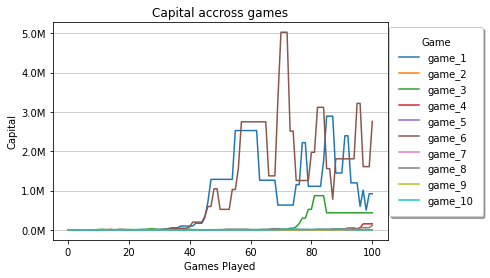

In [84]:
#Init game dictionary to store outcomes.
games_list = {}
#Simulate 10 games
for game in range(1,11):
    #print("Starting game number %d"%(game))
    #Init simulation variables
    capital = 1000
    simulation_list=[capital]
    #Sample 100 games for simulation
    for index, selected_mid in combined_df.sample(n=100).iterrows():
        current_bet = capital*0.5*(get_bet(selected_mid))
        #print("current_bet: %.2f"%(current_bet))
        bet_result = get_bet_result(selected_mid, current_bet)
        #print("bet_result: %.2f"%(bet_result))
        #Update capital according to bet outcome
        capital = capital+bet_result
        #Save simulation result
        simulation_list.append(capital)
    #average capital at the end of the 100 games
    mean = Average(simulation_list)
    print("The average capital for game number %d is %.2f"%(game, mean))
    game_name = "game_"+str(game)
    #Save game simulation
    games_list[game_name] = simulation_list
    #print("Finshed game number %d"%(game))

##Simulation Ended
    
#Line plot each game   
for key, value in games_list.items():
    zeros_array = [0]*(101-len(value))
    games_list[key] = value + zeros_array
    plt.plot(games_list[key], label=key)
    #red_patch = mpatches.Patch(color='red', label=key)
    #plt.legend(label=key)
#Customize plot
plt.title("Capital accross games")
plt.xlabel('Games Played')
plt.ylabel('Capital')
#plt.legend(title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.grid(axis='y', alpha=0.75)
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.legend(loc='upper right', frameon=True, fancybox=True, framealpha=1, shadow=True,
           title="Game",borderpad=1,bbox_to_anchor=(1.30, 1))
plt.show()

## Task 3
### Option 2

### Roulette program

In [85]:
def roulette_wheel(starting_capital, starting_bet):
    """
    The function simulate a single roulette game.
    It takes two arguments: starting_capital and starting_bet
    It return the profit or loss. The chances of winning are 47.4%.
    """
    capital = starting_capital
    bet = starting_bet
    if (starting_bet>starting_capital):
        raise Exception("You can't bet more than what you have.")
    while(True):
        #Sample 1/0 from binomial distrebution with 47.4% chance.
        prob_win = np.random.binomial(1, 0.474, 1)[0]
        if (prob_win==1):
            capital = capital + bet
            #Return profit
            #print("You won %d" %(capital - starting_capital))
            return capital - starting_capital
        else:
            #print("You Lost, double your bet.")
            capital = capital - bet
            bet = bet*2
            #print("Your capital left is: %d, and you want to bet on: %d"%(capital,bet))
            if(bet>capital):
                #print("You do not have enough money to double your bet. Go home.")
                #print("You lost %d"%(capital - starting_capital))
                return capital - starting_capital

Test the program

In [86]:
roulette_wheel(100, 10)

10

## Simulation

### 20 games simulation

In [87]:
games_list=[]
starting_capital = 1275
starting_bet = 5
number_of_simulations = 20
for i in range(1,number_of_simulations+1):
    capital = roulette_wheel(starting_capital, starting_bet)
    games_list.append(capital)
    
simulation_outcome = Average(games_list)
if (simulation_outcome >0):
    print("After %d games, the average profit is: %.2f$"%(number_of_simulations, simulation_outcome))
else:
    print("After %d games, the average loss is: %.2f$"%(number_of_simulations, simulation_outcome))

After 20 games, the average profit is: 5.00$


### 500 games simulation

In [89]:
games_list=[]
starting_capital = 1275
starting_bet = 5
number_of_simulations = 500
for i in range(1,number_of_simulations):
    capital = roulette_wheel(starting_capital, starting_bet)
    games_list.append(capital)
    
simulation_outcome = Average(games_list)
if (simulation_outcome >0):
    print("After %d games, the average profit is: %.2f$"%(number_of_simulations, simulation_outcome))
else:
    print("After %d games, the average loss is: %.2f$"%(number_of_simulations, simulation_outcome))

After 500 games, the average loss is: -7.83$


We can see that after 20 games, most of the time they ween, but when playing 500 games - most of the time they lose.  
The casino alawys win!